In [1]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor

In [2]:
gis = GIS(profile="your_online_profile")

# Drawing Info and Renderer properties

Good morning folks! We get that it's Thursday and you've probably seen a bunch of stuff about admin workflows or cold, hard, data this week, so consider this your break to look at some pretty colors before diving back into that. We're going to look at one of the most fun parts of Web Maps: how we can manipulate the drawing info of Web Map layers, and all of the different options we have for coloring our maps and changing the symbology. 

As some of you might know, JavaScript does a lot of the heavy lifting for these maps, and the data for a map's layers is all stored in JSON dictionaries. In order to edit a map in the Python API, we have to change and add to these dictionaries.

There are a couple ways our API approaches this- we have methods that take advantage of JSAPI methods, and we also have methods that manually construct these dictionaries and add them into the map so they get rendered. If you're really comfortable with the structure, you can put together these dictionaries yourself and add them to the map data. We'll briefly preview all of these methods, but you can read more up on them below.
  
https://developers.arcgis.com/python/guide/advanced-cartography-part1/

We're going to start by just examining what the `drawingInfo` part of a layer's dictionary looks like- this will give us insight into what we're changing. We'll begin with looking at how we can change the color of the good ol' USA, before showing some of the more advanced coloring options we have.

<Item title:"USA States" type:Feature Layer Collection owner:esri_dm>
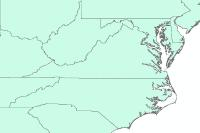

In [3]:
us_states_item = gis.content.get('e26f2752e86d4a8dad52ea75501480f0')
us_states_item

In [4]:
us_states_layer = us_states_item.layers[0]
us_states_layer.properties

{
  "currentVersion": 11,
  "id": 0,
  "name": "dtl_st_trim",
  "type": "Feature Layer",
  "serviceItemId": "e26f2752e86d4a8dad52ea75501480f0",
  "cacheMaxAge": 3600,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1630436151812,
    "schemaLastEditDate": 1630436151812,
    "dataLastEditDate": 1630436151812
  },
  "multiScaleGeometryInfo": {
    "levels": [
      1,
      3,
      5,
      7,
      9,
      11,
      13,
      15
    ],
    "generalizationType": "DP"
  },
  "relationships": [],
  "isDataVersioned": false,
  "hasContingentValuesDefinition": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": 

One important thing to note is that some layers might have their drawing info defined in the source item, while some don't and are just rendered via default settings; when working with maps, you can also choose to edit the source item directly, or only edit the way that layer is rendered in a particular map. We'll further explore the implications of this later. 

For now, we can see that this layer already has some predefined drawing info. Conveniently enough, the Python API's feature layer class has a `renderer` property so you can see this information without having to wade through the entire JSON dict. Let's call this and take a look at the renderer info.

In [31]:
us_states_layer.renderer.keys()

KeysView({'type': 'simple', 'symbol': {'color': [200, 200, 200, 50], 'outline': {'color': [100, 200, 200, 100], 'width': 0.7, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}})

It's pretty easy to see what that color is via free online tools; just take those first RGB values that you see and load them into one. One important thing to understand is that the 4th value in the array is the Alpha value, which dictates the opacity of the color. This is optional to work with, as there are transparency/opacity properties available in the Web Map structure as well.

Let's take a look at what this looks like when we add this layer to a map and switch things around.

In [6]:
map1 = gis.map("Kansas")
map1.zoom = 4
map1

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
map1.add_layer(us_states_layer)

Just as we expected- the yellow color, at a little less than 50% opacity, with a black outline. Understanding how this structure dictates the way your layer is rendered is key to easily editing how your maps look. Let's pick a new color, opacity, and outline style for this layer.

By no means am I a cartographer, so buckle up for some whacky coloring.

In [8]:
us_states_layer.renderer["symbol"]["color"] = [155, 250, 221, 255]
us_states_layer.renderer["symbol"]["outline"]["color"] = [255, 117, 133, 255]
us_states_layer.renderer["symbol"]["outline"]["width"] = 2

In [9]:
map1.remove_layers()
map1.add_layer(us_states_layer)

Oh yeah. Bright, visible, and fully masking the basemap, as every layer should be. All jokes aside, this approach gives us the power to do a lot of nifty things with our layers; for example, a good use in this case with the US layer would be to lightly shade in the country to distinguish it on the basemap from the neighboring countries.

In [10]:
us_states_layer.renderer["symbol"]["color"] = [200, 200, 200, 50]
us_states_layer.renderer["symbol"]["outline"]["color"] = [100, 200, 200, 100]
us_states_layer.renderer["symbol"]["outline"]["width"] = 0.7
map1.remove_layers()
map1.add_layer(us_states_layer)

## Functions that generate renderers

But Noah, what if I don't want to go through the trouble of making these renderer dictionaries myself? Well, you're in luck, because there are a number of other options.

We're currently working towards expanding the options for generating map renderers in the Python API. We know just how many useful functions there are for creating them in the JavaScript API, and we already have a few functions that leverage those; we hope to encapsulate all of them moving forwards, in addition to other handy mapping tools like generating color ramps.

However, we've also already started to add a ton of coloring options inherent to our own rendering functions, including something that's unique to the Python API: the Spatially Enabled DataFrame. For anybody that saw either of my other talks yesterday, I'm sure you're probably sick of hearing me talk about them, but don't worry- even though I could go on talking about the value they bring, we're just using one here as a platform to show the control you have over coloring features in the Python API. Let's load one up, and take a look at how we might define some custom colors.

<Item title:"Africa Bats" type:Feature Layer Collection owner:nparavicini_geosaurus>
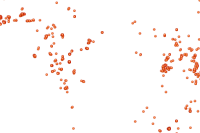

In [11]:
import pandas as pd
a_bats = gis.content.get("6e6f35e6abc3483298fb84c1e843939b")
a_bats

In [12]:
sedf = pd.DataFrame.spatial.from_layer(a_bats.layers[0])
sedf

FID                                              SHAPE  \
0        1  {"x": 3516866.8226507194, "y": -2874822.780768...   
1        2  {"x": 3537659.167309875, "y": -2801390.0766535...   
2        3  {"x": -315532.0910272825, "y": 745536.13268415...   
3        4  {"x": -1833354.0563258133, "y": 1549234.084052...   
4        5  {"x": 4443301.445006841, "y": 996916.694939253...   
...    ...                                                ...   
2092  2093  {"x": 3711378.028336442, "y": 55959.6452486313...   
2093  2094  {"x": 750856.0867481094, "y": 24681.4588675637...   
2094  2095  {"x": 811365.4851307466, "y": 156006.254631917...   
2095  2096  {"x": 975434.2241419714, "y": 401572.859062319...   
2096  2097  {"x": 2811408.7499639783, "y": 45669.538175177...   

                        common_nam        created_at    geoprivacy   idhidden  \
0            Epauletted Fruit Bats  12/17/2010 17:55  -24.99249458     9330.0   
1            Epauletted Fruit Bats  12/21/2013 13:14     -24.39316   485339.0   
2            Noack's roundleaf bat    10/2/2014 9:44      6.682066   905883.0   
3     Gambian Epauletted Fruit Bat    3/8/2011 15:50    13.7821423    12442.0   
4                 Free-tailed Bats  12/21/2013 14:59      8.919212   485462.0   
...                            ...               ...           ...        ...   
2092       Straw-colored Fruit Bat    2/4/2017 18:28   0.502687597  5053748.0   
2093       Straw-colored Fruit Bat    2/4/2017 18:28   0.221716764  5053749.0   
2094       Straw-colored Fruit Bat    2/4/2017 18:28   1.401288312  5053750.0   
2095       Straw-colored Fruit Bat    2/4/2017 18:28   3.605009406  5053752.0   
2096       Straw-colored Fruit Bat    2/4/2017 18:28   0.410252936  5053753.0   

           img                                               info  latitudenu  \
0       m20190  These bats hang out above the tourist's cafete...         0.0   
1      m613632  Satara rest camp, Kruger National Park, South ...         0.0   
2     m1154539                        Noackâ€™s Roundleaf Bat\r\n         0.0   
3       m24617  roosting on the ceiling of the lodge and also ...         0.0   
4      m613749                   Dead bat on thorn of acacia tree         0.0   
...        ...                                                ...         ...   
2092  m6200445  Excerpt from Peel et al (2017)\r\n\r\nLocation...         0.0   
2093  m6200428  Photo caption: E. helvum bats hunted by slings...         0.0   
2094  m6200597  Excerpt from Peel et al (2017)\r\n\r\nMultiple...         0.0   
2095  m6200607  Excerpt from Peel et al (2017)\r\n\r\nMalabo (...         0.0   
2096  m6200419  Excerpt from Peel et al (2017)\r\n\r\nPhotogra...         0.0   

       license  ...                    species_gu      taxon_fami  \
0          CC0  ...             Genus Epomophorus    Pteropodidae   
1               ...         Epauletted fruit bats    Pteropodidae   
2     CC-BY-NC  ...         Noack's roundleaf bat  Hipposideridae   
3          CC0  ...  Gambian epauletted fruit bat    Pteropodidae   
4               ...              Free-tailed bats      Molossidae   
...        ...  ...                           ...             ...   
2092  CC-BY-NC  ...       Straw-colored Fruit Bat    Pteropodidae   
2093  CC-BY-NC  ...       Straw-colored Fruit Bat    Pteropodidae   
2094  CC-BY-NC  ...       Straw-colored Fruit Bat    Pteropodidae   
2095  CC-BY-NC  ...       Straw-colored Fruit Bat    Pteropodidae   
2096  CC-BY-NC  ...       Straw-colored Fruit Bat    Pteropodidae   

        taxon_genu  taxon_idlo         taxon_supe time_obser  \
0      Epomophorus     40807.0                                 
1      Epomophorus     40807.0                         19:37   
2     Hipposideros     40747.0     Rhinolophoidea              
3      Epomophorus     40812.0                                 
4                      41226.0  Vespertilionoidea              
...            ...         ...                ...        ...   
209

First, we'll just get a simple representation of all our features on the map.

In [13]:
map2 = gis.map("Africa")
map2.zoom = 3
map2

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
map2.remove_layers()
sedf.spatial.plot(
    map_widget = map2,
    colors = [117, 255, 216, 255],
    renderer_type = "s",
    marker_size=6,
    line_width=0.4,
)

True

But this is a bit boring, isn't it? Let's look at our other options for coloring this map's features.

## Colorbrewer and Palettable

For any of you coming from a cartography background, I'm sure you're familiar with Colorbrewer. Colorbrewer palettes are a cornerstone of effective mapping; I'm probably not going to do them justice with my hackneyed developer description of them, but they're the result of a cartographer-designed web tool meant to create effective, distinctive, yet visually appealing palettes for a multitude of data types. In version 2.1.0, we added support for palettes exported from the Colorbrewer website, found here: https://colorbrewer2.org/

Additionally, we also added support for an extremely helpful 3rd-party library: Palettable. Palettable contains a ton of pre-defined palettes from a variety of sources, including all of the Colorbrewer palettes, plus other sources such as Matplotlib and MyCarta. Palettable objects are particularly handy in that the color data can easily be expressed in a ton of different ways, as noted by their documentation: https://jiffyclub.github.io/palettable/

We'll go ahead and pick a Colorbrewer palette, use it to render our SeDF features, and then find it's corresponding Palettable object and use that to render our features as well.

In [15]:
sedf.taxon_supe.value_counts()

                     1071
Rhinolophoidea        434
Vespertilionoidea     385
Emballonuroidea       207
Name: taxon_supe, dtype: Int64

In [16]:
map3 = gis.map("Gabon")
map3.zoom = 3
map3

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
map3.remove_layers()
sedf.spatial.plot(
    map_widget = map3,
    renderer_type="h",
    colors = palette,
    # col = "taxon_supe",
    #marker_size=6,
    # line_width=0.4,
)

True

In [39]:
wm = map3.webmap

In [40]:
wm.layers

[{
   "title": "Feature Collection Layer",
   "opacity": 1,
   "visibility": true,
   "id": "8765604416115",
   "layerDefinition": {
     "definitionExpression": null
   },
   "layerType": "ArcGISFeatureLayer",
   "featureCollection": {
     "layers": [
       {
         "featureSet": {
           "features": [
             {
               "geometry": {
                 "x": 3516866.8226507194,
                 "y": -2874822.780768538,
                 "spatialReference": {
                   "wkid": 102100,
                   "latestWkid": 3857
                 }
               },
               "attributes": {
                 "FID": 1,
                 "common_nam": "Epauletted Fruit Bats",
                 "created_at": "12/17/2010 17:55",
                 "geoprivacy": "-24.99249458",
                 "idhidden": 9330.0,
                 "img": "m20190",
                 "info": "These bats hang out above the tourist's cafeteria in Skukuza.",
                 "latitudenu": 0.0,
 

In [22]:
map3.remove_layers()

True

In [21]:
import palettable.colorbrewer as cb
import palettable.mycarta as mc
# palette = cb.diverging.RdGy_4
palette = mc.Cube1_4

Preeeeettttttty neat!

## Colormaps and creating your own

We're going to finish by examining two final ways to color your maps- and that's right, one of them is creating your own custom palettes! 

Another option for pre-defined palettes is Matplotlib colormaps- the ArcGIS API for Python supports passing the string name of certain colormaps into the renderers. More can be read about those here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

One thing to note is that Palettable objects also can output the Matplotlib colormap object of a certain palette. Just for visual representation, we'll take a look.

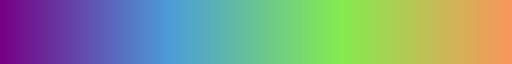

In [24]:
palette.mpl_colormap

The colormap represents a spectrum of colors, with 256 unique colorstops; we can access the RGB values of one of these colorstops by doing this.

In [25]:
palette.mpl_colormap(140, bytes=True)

(112, 207, 128, 255)

One of the handiest things about these colormaps is that they give you an instant, inline representation of your palette. In 2.1.0., we added support for something else in the rendering methods: passing your own custom list of RGB+A arrays, which generates your own custom colormap internally in the function. 

However, we thought it would be better to also create a public-facing method that lets you visualize how your potential palette would look, so we present to you: `create_colormap()`. Here it is in action.

In [26]:
from arcgis.mapping import create_colormap
mango_colors = [[100, 255, 44, 255], [200, 190, 100, 255], [230, 135, 120, 255], [255, 60, 150, 255]]
mallard_colors = [
    [255, 255, 255, 255],
    [237, 240, 238, 255],
    [112, 104, 98, 255],
    [30, 31, 30, 255],
    [31, 166, 67, 255],
    [6, 196, 95, 255],
]
mango = create_colormap(mango_colors, "Mango_4")
mallard = create_colormap(mallard_colors, "Mallard_6")

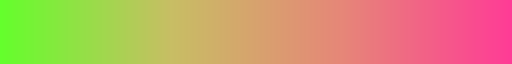

In [27]:
mango

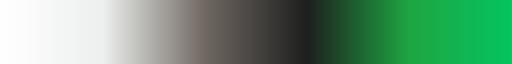

In [28]:
mallard

Boom. Just like that, you can define an array of color stops, and visualize how those stops would come together as a colormap. Now, let's use one of those arrays to render our bat layer.

In [29]:
map4 = gis.map("Gabon")
map4.zoom = 3
map4

MapView(layout=Layout(height='400px', width='100%'))

In [30]:
map4.remove_layers()
sedf.spatial.plot(
    map_widget = map4,
    renderer_type="h",
    colors = mango_colors,
    max_intensity=50,
)

True

And there we have it!